In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from CAVI_UGMM_simples import CAVI_UGMM_simples

In [2]:
dados = pd.read_csv('UGMM_simples_simulado.csv')

dados.head()

,var_observada,var_latente
0,-5.150820,-5.0
1,-1.766516,-2.5
2,-6.668871,-5.0
3,1.008525,0.0
4,2.329280,2.5


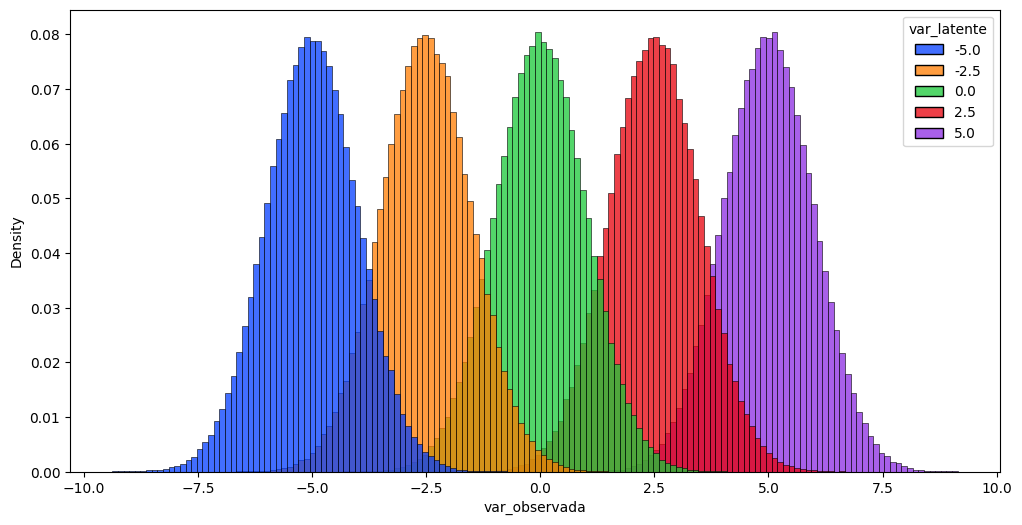

In [3]:
plt.figure(figsize = (12, 6))

sns.histplot(

    data = dados, 
    x = 'var_observada', 
    hue = 'var_latente', 
    stat = 'density', 
    palette = 'bright', 
    alpha = 0.75

)

plt.show()

In [4]:
CAVI_UGMM_simples_2_grupos = CAVI_UGMM_simples(num_categorias = 5, dados = np.array(dados['var_observada']), var_priori = 10e6)

CAVI_UGMM_simples_2_grupos.ajusta_modelo()

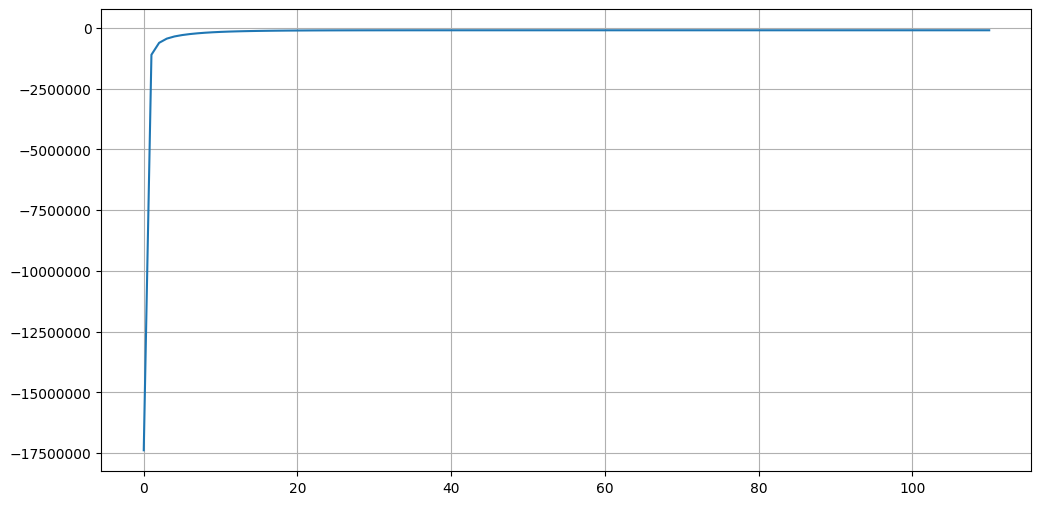

In [5]:
plt.figure(figsize = (12, 6))

sns.lineplot(CAVI_UGMM_simples_2_grupos.historico_ELBO)

plt.ticklabel_format(style = 'plain')

plt.grid()

plt.show()

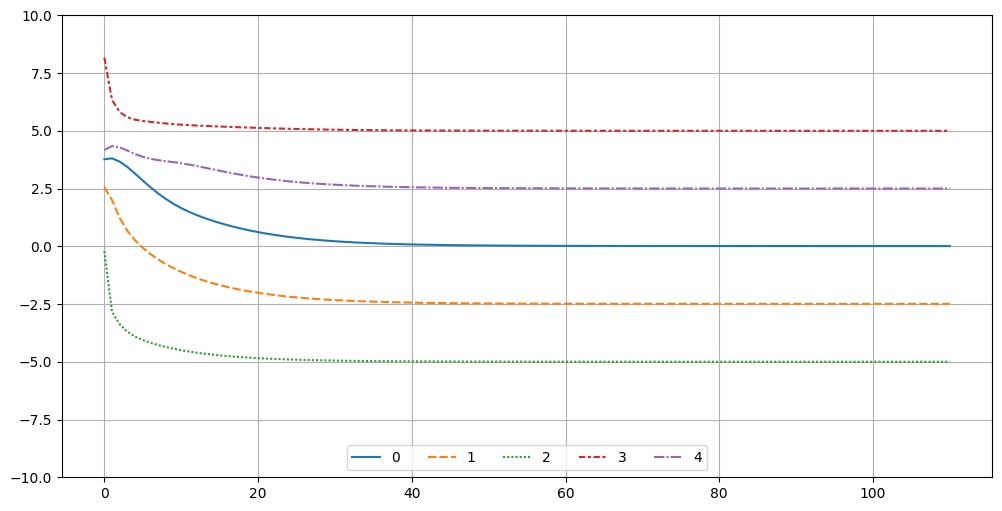

In [6]:
plt.figure(figsize = (12, 6))

sns.lineplot(pd.DataFrame(CAVI_UGMM_simples_2_grupos.historico_media))

plt.ticklabel_format(style = 'plain')

plt.grid()

plt.ylim([-10, 10])

plt.legend(ncol = 5, loc = 'lower center')

plt.show()

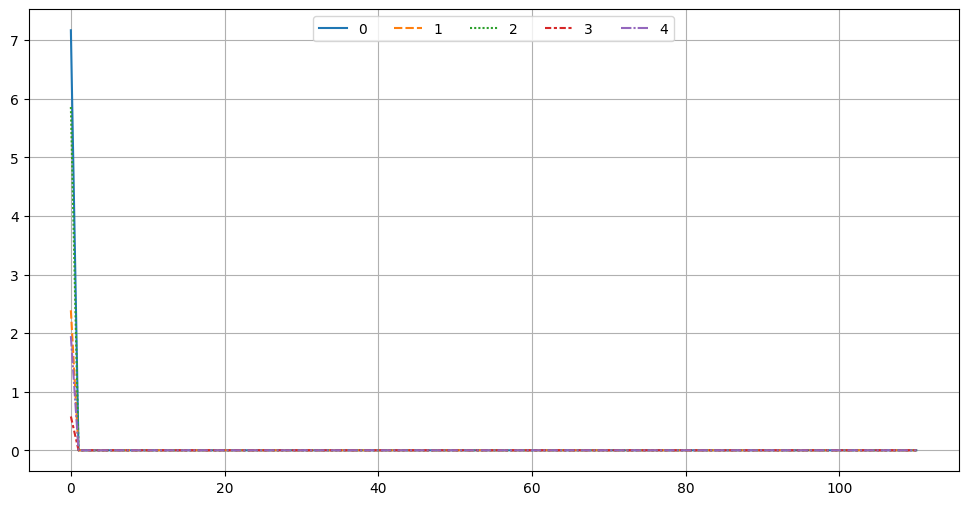

In [7]:
plt.figure(figsize = (12, 6))

sns.lineplot(pd.DataFrame(CAVI_UGMM_simples_2_grupos.historico_var))

plt.ticklabel_format(style = 'plain')

plt.grid()

plt.legend(ncol = 5, loc = 'upper center')

plt.show()

In [9]:
classes_cavi = CAVI_UGMM_simples_2_grupos.prob.argmax(1)

classes_cavi = np.array([CAVI_UGMM_simples_2_grupos.media[classes_cavi[i]] for i in range(len(dados))]).round(1)

print(f'Acurácia (CAVI): {sum(dados['var_latente'] == classes_cavi)/len(dados)}')

Acurácia (CAVI): 0.830377
